<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[Brain Sentiment Data](Introduction.ipynb) › Part 2: Brain Language Metrics on Company Filings
***

# Brain Language Metrics on Company Filings

In this notebook, we use Alphalens to examine the Brain Language Metrics on Company Filings dataset (BLMCF).

Start by setting the bundle for this notebook:

In [1]:
from zipline.research import use_bundle
use_bundle("usstock-1d-bundle")

Next, we create a Pipeline that contains the `SCORE_CONSTRAINING` field, which measures the percentage of "constraining" words in the report. We limit the analysis to 10-K reports for the top 1000 stocks by dollar volume.

In [2]:
from zipline.pipeline import Pipeline, brain, master
from zipline.pipeline.factors import AverageDollarVolume

# limit analysis to stocks
universe = master.SecuritiesMaster.SecType.latest.eq("STK")

avg_dollar_volume = AverageDollarVolume(window_length=90)

constraining_language =  brain.BLMCF.slice("10-K").SCORE_CONSTRAINING.latest

pipeline = Pipeline(
    columns={
        "constraining_language": constraining_language,
    },
    initial_universe=universe,
    screen=(
        avg_dollar_volume.top(1000) 
        & constraining_language.notnull()
    )
)

Next, we run the Pipeline and generate the tear sheet. Stocks with more constraining language in their 10-K reports underperform stocks with less constraining language.

,min,max,mean,std,count,avg daily count,count %
Constraining Language Quantile,,,,,,,
1,0.047,0.112,0.096,0.011,"509,583",142.2,20.1%
2,0.099,0.123,0.113,0.004,"505,836",141.1,20.0%
3,0.114,0.132,0.124,0.003,"504,808",140.9,19.9%
4,0.122,0.146,0.136,0.004,"505,420",141.0,20.0%
5,0.130,0.353,0.157,0.014,"504,902",140.9,20.0%


,1D,21D
Ann. alpha,-0.025,-0.025
beta,0.073,0.090
Mean Relative Return Top Quantile (bps),-0.621,-0.574
Mean Relative Return Bottom Quantile (bps),0.875,0.684
Mean Spread (bps),-1.496,-1.302


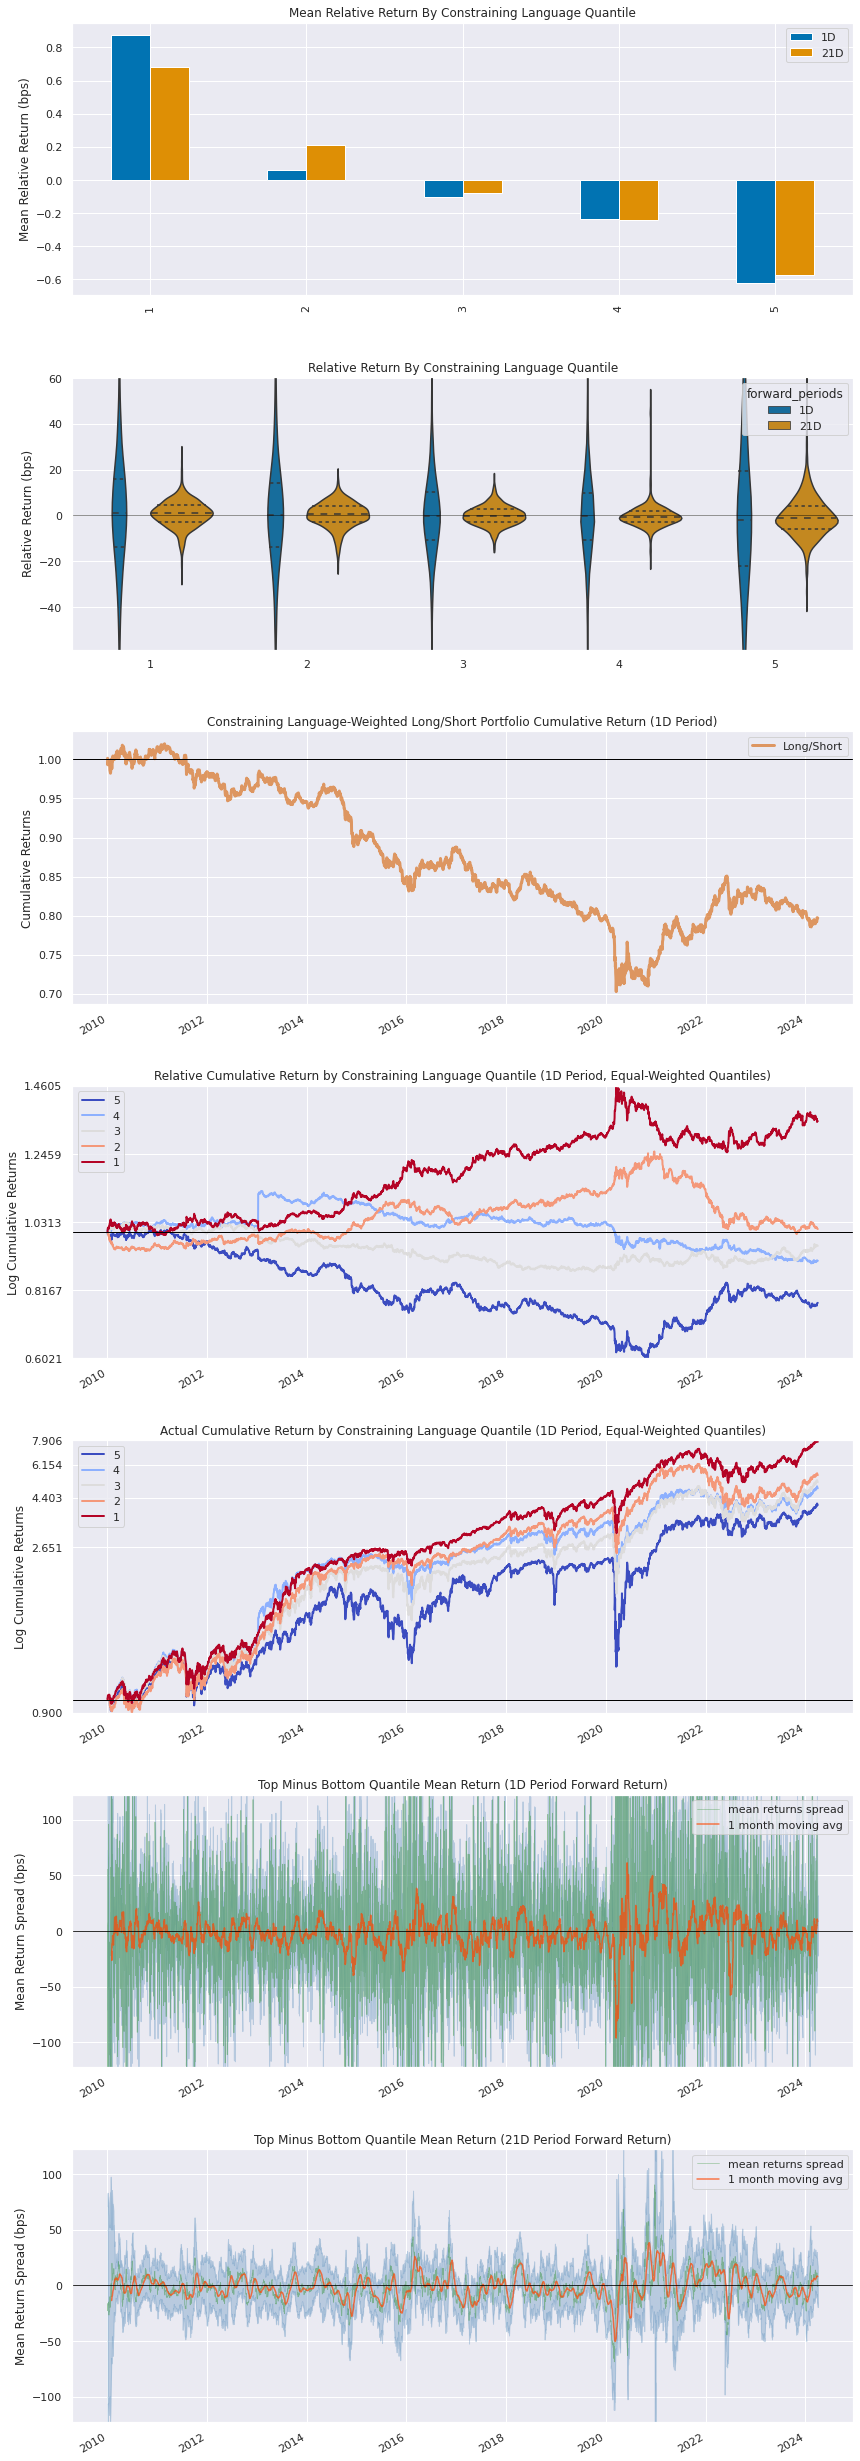

,1D,21D
IC Mean,-0.006,-0.018
IC Std.,0.100,0.095
Risk-Adjusted IC,-0.063,-0.191
t-stat(IC),-3.752,-11.445
p-value(IC),0.000,0.000
IC Skew,0.056,0.020
IC Kurtosis,-0.274,-0.453


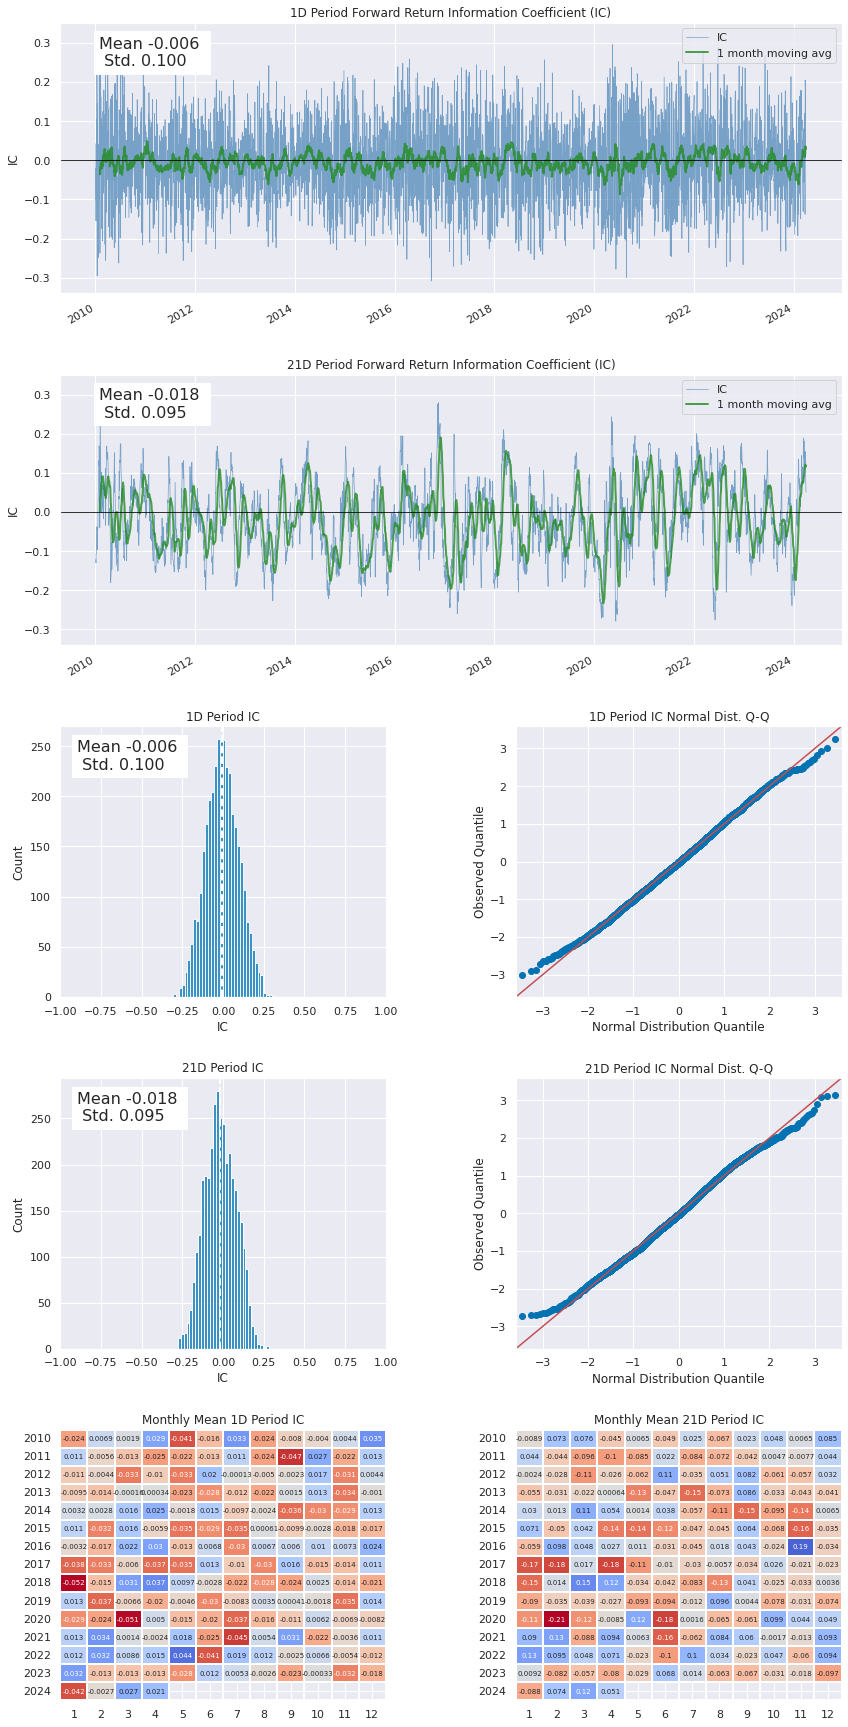

,1D,21D
Quantile 1 Mean Turnover,0.005,0.049
Quantile 2 Mean Turnover,0.010,0.088
Quantile 3 Mean Turnover,0.011,0.095
Quantile 4 Mean Turnover,0.010,0.089
Quantile 5 Mean Turnover,0.007,0.064


,1D,21D
Mean Factor Rank Autocorrelation,1.0,0.994


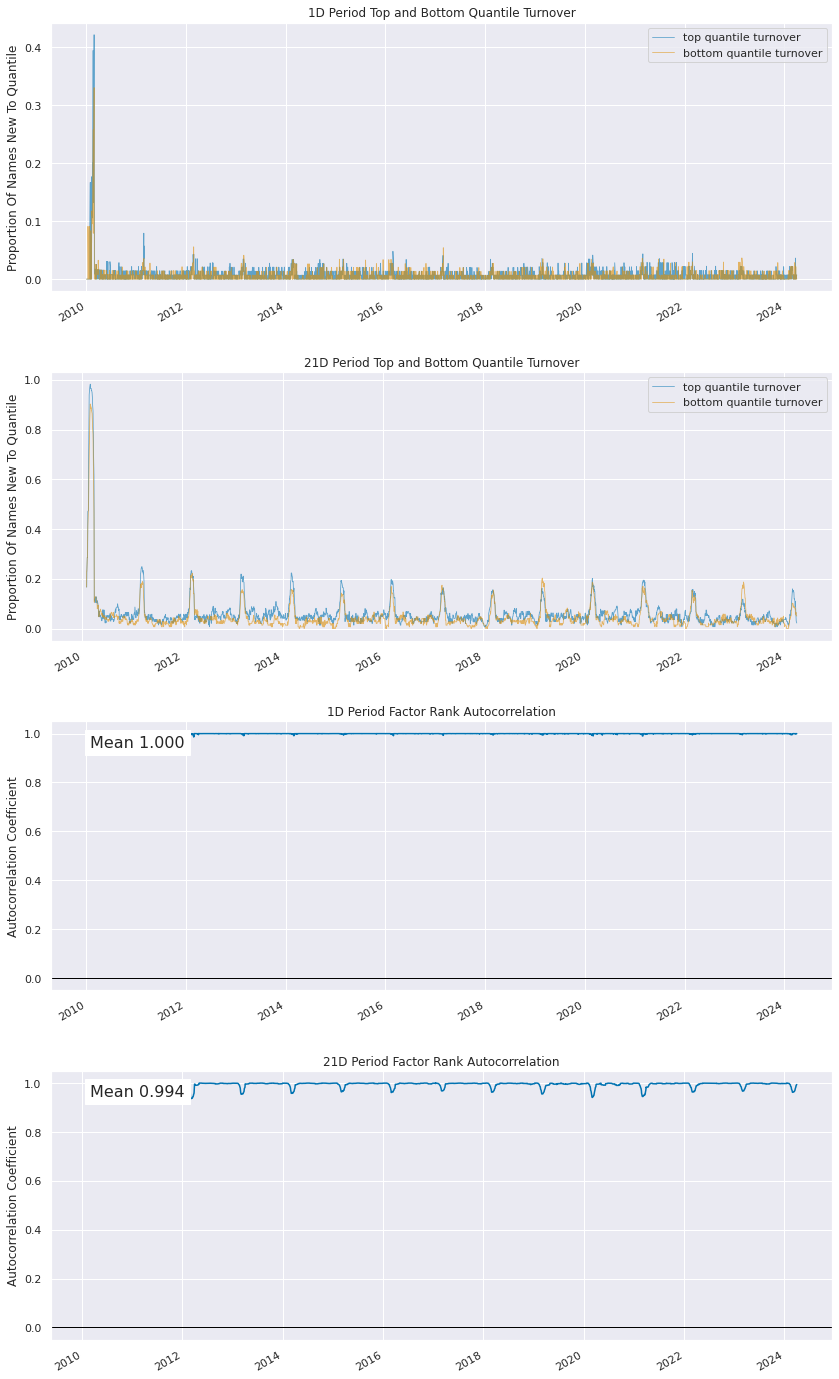

In [3]:
import alphalens as al

factor_data = al.from_pipeline(
    pipeline,
    start_date="2010-01-01", # start of dataset
    end_date="2024-03-31",
    factor="constraining_language",
    periods=[1, 21],
    quantiles=5,
    segment="Y"
)